# Flow chart 
### Solve classification problems

- Flow
    1. Use backpropagation to find dereivatives
    2. Use Gradient descendant to adjust params

## 2 layers perceptrons
![CG](https://phyblas.hinaboshi.com/rup/nayuki/umaki/h01.png)
### $$
\begin{align}
\pmb{a}_1 = \mathbf{x} \cdot \mathbf{w}_1 + \vec{b}_1^T \\
\mathbf{h}_1 = \frac{1}{1+\exp(-\pmb{a}_1)} \\
\pmb{a}_2 = \pmb{h}_1 \cdot \mathbf{w}_2 + \vec{b}_2^T \\
\mathbf{h}_2 = \frac{1}{1+\exp(-\pmb{a}_2)} \\
J = \frac{1}{n}\mathbf{sum}(\mathbf{z}\ln\mathbf{h})
\end{align}
$$
$h_1$ & $h_2$ are Sigmoid AF


#### $
\begin{align}
\mathbf{g}_{h_2} &=& \frac{\partial J}{\partial \mathbf{h}_2} &=& \frac{\mathbf{z}}{n\mathbf{h}_2} \\
\mathbf{g}_{a_2} &=& \frac{\partial J}{\partial \pmb{a}_2} &=& \frac{1}{n}(\mathbf{h}_2-\mathbf{z}) \\
\mathbf{g}_{w_2} &=& \frac{\partial J}{\partial \mathbf{w}_2} &=& \mathbf{h}_1^T \cdot \mathbf{g}_{a_2} \\
\vec{g}_{b_2} &=& \frac{\partial J}{\partial \vec{b}_2} &=& \mathbf{g}_{a_2} \cdot \vec{1}_n \\
\mathbf{g}_{h_1} &=& \frac{\partial J}{\partial \mathbf{h}_1} &=& \mathbf{g}_{a_2} \cdot \mathbf{w}_2^T \\
\mathbf{g}_{a_1} &=& \frac{\partial J}{\partial \pmb{a}_1} &=& \mathbf{g}_{h_1} \mathbf{h}_1(1-\mathbf{h}_1) \\
\mathbf{g}_{w_1} &=& \frac{\partial J}{\partial \mathbf{w}_1} &=& \mathbf{x}^T \cdot \mathbf{g}_{a_1} \\
\vec{g}_{b_1} &=& \frac{\partial J}{\partial \vec{b}_1} &=& \mathbf{g}_{a_2} \cdot \vec{1}_n
\end{align}
$

![derivatives CG](https://phyblas.hinaboshi.com/rup/nayuki/umaki/h02.png)

### Parameters to adjust 
### $$
\begin{align}
\Delta \mathbf{w}_2 &= -\eta \mathbf{g}_{w_2} \\
\Delta \vec{b}_2 &= -\eta \vec{g}_{b_2} \\
\Delta \mathbf{w}_1 &= -\eta \mathbf{g}_{w_1} \\
\Delta \vec{b}_1 &= -\eta \vec{g}_{b_1}
\end{align}
$$
##### *Trick* initial weights must not be all zeros in same time
##### So we randomize 

# Classify data of 4 groups 
### which can not solve by normal linear model

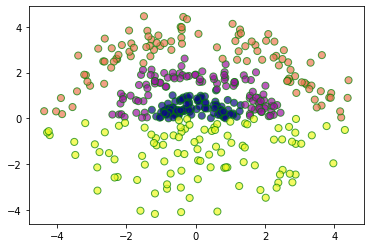

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
n = 100
r = np.hstack([
    np.random.normal(.8, .25, n),
    np.random.normal(2, .3, n),
    np.random.normal(3.6, .4, n),
    np.random.uniform(.2, 4.5, n),
])
t = target = np.hstack([
    np.random.uniform(0, np.pi, 300),
    np.random.uniform(-np.pi, 0, 100),
])
X = np.array([
    r*np.cos(t), r*np.sin(t)
]).T

n_groups = 4
z = np.arange(n_groups).repeat(100)

plt.scatter(X[:,0], X[:, 1], 50, c=z, alpha=.7, edgecolor='g', cmap='plasma')
plt.show()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def softmax(x):
    exp_x = np.exp(x.T - x.max(1))
    return (exp_x/exp_x.sum(0)).T
def cal_onehot(z,n):
    return (z[:, None] == range(n)).astype(int)
def cal_entropy(Z,h):
    return -(np.log(h[z==1] + 1e-10)).mean()

class TwoLayersNN:
    def __init__(self, m, eta):
        self.eta = eta
        self.m = m
    
    def cal_a1(self, X):
        return np.dot(X, self.w1) + self.b1
    
    def cal_a2(self, X):
        return np.dot(X, self.w2) + self.b2
    
    def learn(self, X, z, n_learns):
        self.n_groups = int(z.max()) + 1
        Z = cal_onehot(z, self.n_groups)
        
        self.w1 = np.random.normal(0, 1, [X.shape[1], self.m])
        self.b1 = np.zeros(self.m)
        self.w2 = np.random.normal(0, 1, [self.m, self.n_groups])
        self.b2 = np.zeros(self.n_groups)
        
        self.entropy = []
        self.score = []
        
        for o in range(n_learns):
            a1 = self.cal_a1(X)
            h1 = sigmoid(a1)
            
            a2 = self.cal_a2(h1)
            h2 = softmax(a2)
            
            J = cal_entropy(Z, h2)
            
            ga2 = (h2-Z)/len(Z)
            gh1 = np.dot(ga2, self.w2.T)
            ga1 = gh1 * h1 * (1-h1)
            
            self.w2 -= self.eta * np.dot(h1.T, ga2)
            self.b2 -= self.eta * ga2.sum(0)
            self.w1 -= self.eta*np.dot(X.T,ga1)
            self.b1 -= self.eta*ga1.sum(0)
            self.entropy.append(J)
            score = ((a2).argmax(1)==z).mean()
            self.score.append(score)
            if(o%100==99):
                print(u'ผ่านไป %d รอบ คะแนน %.3f'%(o+1,score))
    def predict(self, X):
        a1 = self.cal_a1(X)
        h1 = sigmoid(a1)
        a2 = self.cal_a2(h1)
        h2 = softmax(a2)
        return h2.argmax(1)


ผ่านไป 100 รอบ คะแนน 0.825
ผ่านไป 200 รอบ คะแนน 0.887
ผ่านไป 300 รอบ คะแนน 0.912
ผ่านไป 400 รอบ คะแนน 0.948
ผ่านไป 500 รอบ คะแนน 0.960
ผ่านไป 600 รอบ คะแนน 0.970
ผ่านไป 700 รอบ คะแนน 0.975
ผ่านไป 800 รอบ คะแนน 0.975
ผ่านไป 900 รอบ คะแนน 0.978
ผ่านไป 1000 รอบ คะแนน 0.978
ผ่านไป 1100 รอบ คะแนน 0.978
ผ่านไป 1200 รอบ คะแนน 0.983
ผ่านไป 1300 รอบ คะแนน 0.983
ผ่านไป 1400 รอบ คะแนน 0.983
ผ่านไป 1500 รอบ คะแนน 0.983
ผ่านไป 1600 รอบ คะแนน 0.983
ผ่านไป 1700 รอบ คะแนน 0.983
ผ่านไป 1800 รอบ คะแนน 0.983
ผ่านไป 1900 รอบ คะแนน 0.985
ผ่านไป 2000 รอบ คะแนน 0.985


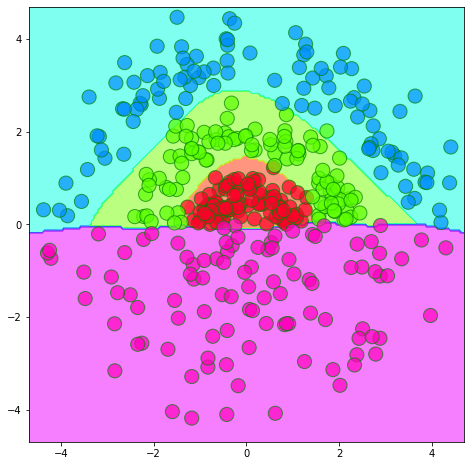

In [17]:
nn = TwoLayersNN(m=10, eta=.5)
nn.learn(X, z, n_learns=2000)

# X from 3 above cell
mm = X.max() * 1.05
mx, my = np.meshgrid(np.linspace(-mm, mm, 200), 
                    np.linspace(-mm, mm, 200), )
mX = np.array([mx.ravel(), my.ravel()]).T
mz = nn.predict(mX).reshape(200, -1)

cm = plt.cm.gist_rainbow
plt.figure(figsize=(8,8))
plt.axes(aspect=1, xlim=(-mm, mm), ylim=(-mm, mm), )
plt.contourf(mx, my, mz, cmap=cm, alpha=.5)
# plt.contour(mx, my, mz, c='k', alpha=.4, )
plt.scatter(X[:,0], X[:, 1], 200, c=z, alpha=.7, edgecolor='g', cmap=cm)
plt.show()

# Classify Images 5 Groups

ผ่านไป 100 รอบ คะแนน 0.398
ผ่านไป 200 รอบ คะแนน 0.490
ผ่านไป 300 รอบ คะแนน 0.557
ผ่านไป 400 รอบ คะแนน 0.574
ผ่านไป 500 รอบ คะแนน 0.621
ผ่านไป 600 รอบ คะแนน 0.651
ผ่านไป 700 รอบ คะแนน 0.678
ผ่านไป 800 รอบ คะแนน 0.702
ผ่านไป 900 รอบ คะแนน 0.719
ผ่านไป 1000 รอบ คะแนน 0.737
ผ่านไป 1100 รอบ คะแนน 0.751
ผ่านไป 1200 รอบ คะแนน 0.761
ผ่านไป 1300 รอบ คะแนน 0.771
ผ่านไป 1400 รอบ คะแนน 0.780
ผ่านไป 1500 รอบ คะแนน 0.790
ผ่านไป 1600 รอบ คะแนน 0.797
ผ่านไป 1700 รอบ คะแนน 0.805
ผ่านไป 1800 รอบ คะแนน 0.809
ผ่านไป 1900 รอบ คะแนน 0.807
ผ่านไป 2000 รอบ คะแนน 0.814
ผ่านไป 2100 รอบ คะแนน 0.818
ผ่านไป 2200 รอบ คะแนน 0.822
ผ่านไป 2300 รอบ คะแนน 0.827
ผ่านไป 2400 รอบ คะแนน 0.832
ผ่านไป 2500 รอบ คะแนน 0.836
ผ่านไป 2600 รอบ คะแนน 0.840
ผ่านไป 2700 รอบ คะแนน 0.842
ผ่านไป 2800 รอบ คะแนน 0.847
ผ่านไป 2900 รอบ คะแนน 0.850
ผ่านไป 3000 รอบ คะแนน 0.854
ผ่านไป 3100 รอบ คะแนน 0.859
ผ่านไป 3200 รอบ คะแนน 0.863
ผ่านไป 3300 รอบ คะแนน 0.867
ผ่านไป 3400 รอบ คะแนน 0.867
ผ่านไป 3500 รอบ คะแนน 0.870
ผ่านไป 3600 รอบ คะแนน 0.872
ผ

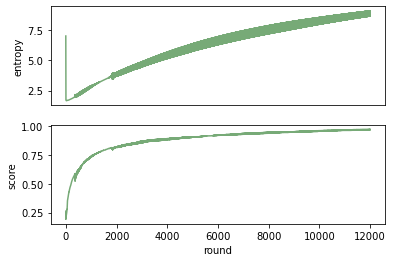

In [18]:
from glob import glob
uri = '../../SAMPLE DATA/ruprang-raisi-25x25x1000x5/*/*.png'
n = 1000
X = np.array([plt.imread(x) for x in sorted(glob(uri))])
X = X.reshape(-1, 25*25)
z = np.arange(5).repeat(n)

nn = TwoLayersNN(m=50, eta=.25)
nn.learn(X, z, n_learns=12000)

plt.subplot(211, xticks=[])
plt.plot(nn.entropy, '#77aa77')
plt.ylabel('entropy')

plt.subplot(212, )
plt.plot(nn.score, '#77aa77')
plt.ylabel('score')

plt.xlabel('round')
print(nn.score[-1], len(nn.score))
plt.show()